## probability density function

In [16]:
def F(x):
    if x > 180:
        return (x-180)/540 + 2/3
    else:
        return x/270

In [17]:
f = [F(x) for x in range(360)]

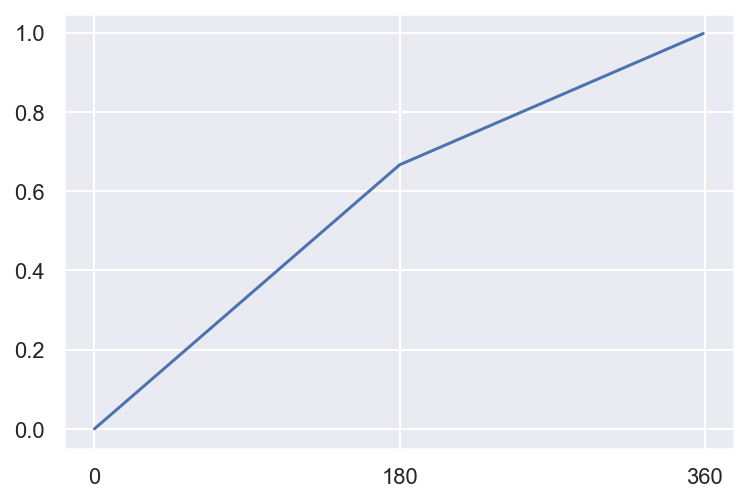

In [18]:
plt.plot(f);
plt.xticks([0,180,360]);

In [21]:
round(F(270)-F(90),2)

0.5

## pgmpy package

In [2]:
from pgmpy.factors.discrete import JointProbabilityDistribution as JPD

In [3]:
px = JPD(['X'], [2], [0.6,0.4])
print(px)

+------+--------+
| X    |   P(X) |
+======+========+
| X(0) | 0.6000 |
+------+--------+
| X(1) | 0.4000 |
+------+--------+


In [4]:
py = JPD(['Y'], [2], [0.5,0.5])
print(py)

+------+--------+
| Y    |   P(Y) |
+======+========+
| Y(0) | 0.5000 |
+------+--------+
| Y(1) | 0.5000 |
+------+--------+


In [5]:
pxy = JPD(['X','Y'], [2,2], np.array([3,9,7,1])/20)
print(pxy)

+------+------+----------+
| X    | Y    |   P(X,Y) |
+======+======+==========+
| X(0) | Y(0) |   0.1500 |
+------+------+----------+
| X(0) | Y(1) |   0.4500 |
+------+------+----------+
| X(1) | Y(0) |   0.3500 |
+------+------+----------+
| X(1) | Y(1) |   0.0500 |
+------+------+----------+


In [6]:
pxy_2 = JPD(['X','Y'], [2,2], np.array([3,3,2,2])/10)
print(pxy_2)

+------+------+----------+
| X    | Y    |   P(X,Y) |
+======+======+==========+
| X(0) | Y(0) |   0.3000 |
+------+------+----------+
| X(0) | Y(1) |   0.3000 |
+------+------+----------+
| X(1) | Y(0) |   0.2000 |
+------+------+----------+
| X(1) | Y(1) |   0.2000 |
+------+------+----------+


In [7]:
pmx = pxy.marginalize(['Y'], inplace=False)
pmx

<Joint Distribution representing P(X:2) at 0x1bdab2237c0>

In [8]:
print(pmx)

+------+--------+
| X    |   P(X) |
+======+========+
| X(0) | 0.6000 |
+------+--------+
| X(1) | 0.4000 |
+------+--------+


In [10]:
pxy_2.check_independence(['X'],['Y'])

True

## Bayesian rule

In [16]:
from pgmpy.factors.discrete import TabularCPD

cpd_X = TabularCPD('X', 2, [[0.998], [0.002]])

print(cpd_X)

+------+-------+
| X(0) | 0.998 |
+------+-------+
| X(1) | 0.002 |
+------+-------+


In [17]:
cpd_Y_on_X = TabularCPD('Y', 2, np.array([[0.95, 0.01],[0.05, 0.99]]),
                        evidence=['X'], evidence_card=[2])
print(cpd_Y_on_X)

+------+------+------+
| X    | X(0) | X(1) |
+------+------+------+
| Y(0) | 0.95 | 0.01 |
+------+------+------+
| Y(1) | 0.05 | 0.99 |
+------+------+------+


In [18]:
from pgmpy.models import BayesianModel

model = BayesianModel([('X', 'Y')])
model.add_cpds(cpd_X, cpd_Y_on_X)
model.check_model()

True

In [19]:
from pgmpy.inference import VariableElimination

inference = VariableElimination(model)
posterior = inference.query(['X'], evidence={'Y':1}, joint=False, show_progress=False)
print(posterior['X'])

+------+----------+
| X    |   phi(X) |
+======+==========+
| X(0) |   0.9618 |
+------+----------+
| X(1) |   0.0382 |
+------+----------+
